In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [96]:
file_path = "/Users/alexanderprinz/Downloads/financials.feather"
findata = pd.read_feather(file_path)
print(findata.info())
print(findata.head(20))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438957 entries, 0 to 2438956
Columns: 135 entries, index to bvd_table
dtypes: float64(87), int64(1), object(47)
memory usage: 2.5+ GB
None
    index          idnr currency nat_prim_code nace_prim_code naics_core_code  \
0       0  AT9130090333      EUR        P85320           8532            6111   
1       1  AT9010000033      EUR        L68209           6820            5311   
2       2  AT9010000033      EUR        L68209           6820            5311   
3       3  AT9010000033      EUR        L68209           6820            5311   
4       4  AT9010000033      EUR        L68209           6820            5311   
5       5  AT9010000033      EUR        L68209           6820            5311   
6       6  AT9010000033      EUR        L68209           6820            5311   
7       7  AT9010000033      EUR        L68209           6820            5311   
8       8  AT9010000033      EUR        L68209           6820            5311   


In [148]:
findata[]

,index,idnr,currency,nat_prim_code,nace_prim_code,naics_core_code,ussic_core_code,sd_isin,sd_sedol,sd_ticker,...,gear,ppe,tpe,sct,ace,sfpe,wcpe,tape,bvd_table,Total_Score
0,0,AT9130090333,EUR,P85320,8532,6111,821,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,amadeus_m,0.300000
1,1,AT9010000033,EUR,L68209,6820,5311,651,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,amadeus_m,0.312342
2,2,AT9010000033,EUR,L68209,6820,5311,651,None,None,None,...,NaN,NaN,NaN,NaN,NaN,6322.0,NaN,9298.0,amadeus_m,0.312341
3,3,AT9010000033,EUR,L68209,6820,5311,651,None,None,None,...,NaN,NaN,NaN,NaN,NaN,5671.0,NaN,7419.0,amadeus_m,0.312881
4,4,AT9010000033,EUR,L68209,6820,5311,651,None,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,amadeus_m,0.312880
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2438952,94938,DE8350148522,EUR,C10000,1000,311,200,None,None,None,...,-5.69,223.0,NaN,NaN,48.0,611.0,13.0,687.0,amadeus_v,0.469689
2438953,94939,DE8350148522,EUR,C10000,1000,311,200,None,None,None,...,-4.86,287.0,704.0,6.82,48.0,721.0,11.0,816.0,amadeus_v,0.626436
2438954,94940,DE8350148522,EUR,C10000,1000,311,200,None,None,None,...,-16.55,341.0,795.0,6.09,48.0,352.0,21.0,448.0,amadeus_v,0.708390
2438955,94941,DE8350148522,EUR,C10000,1000,311,200,None,None,None,...,-16.02,406.0,919.0,5.53,51.0,610.0,37.0,750.0,amadeus_v,0.732776


Performance Score

Total_Score = Product(Sub_Scores)**0.2
Sub_Scores = Sum(weighted Percentile Ranks)
             - Percentile Rank grouped by Country (country) and Sector (NAT_PRIM_CODE)
             - Missing values = 0.5
             - Weighted according to the dict below

a) profitability
Return on shareholders funds (%) (RSHF) hib 0.5
Return on capital employed (%) (RCEM) hib 0.25
Return on total assets (%) (RTAS) hib 0.25

b) margins
Profit margin (%) (PRMA) hib 1/6
Gross Margin (%) (GRMA) hib 1/6
EBITDA Margin (%) (ETMA) hib 1/6
EBIT Margin (%) (EBMA) hib 1/6
Cash flow/Turnover (%) (CFOP) hib 1/3

c) balance sheet health
Liquidity ratio (x) (LIQR) hib 1/6
Shareholders liquidity ratio (x) (SHLQ) hib 1/6
Solvency ratio (%) (SOLR) hib 1/6
Gearing (%) (GEAR)lib 1/6
Interest cover (x) (IC) hib 1/3

d) working capital efficiency
Stock turnover (x) (STOT) hib 1/3
Collection period (days) (COLL) lib 1/3
Credit period (days) (CRPE) hib 1/3

e) labor productivity
Profit per employee (PPE) hib 1/3
Operat. rev. per employee (TPE) hib 1/3
Aver. cost of empl./year (ACE) lib 1/3

In [116]:
score_weights = {
    "performance_score_a": {"rshf": 1/2, "rcem": 1/4, "rtas": 1/4},
    "performance_score_b": {"prma": 1/6, "grma": 1/6, "etma": 1/6, "ebma": 1/6, "cfop": 1/3},
    "performance_score_c": {"liqr": 1/6, "shlq": 1/6, "solr": 1/6, "gear": 1/6, "ic": 1/3},
    "performance_score_d": {"stot": 1/3, "coll": 1/3, "crpe": 1/3},
    "performance_score_e": {"ppe": 1/3, "tpe": 1/3, "ace": 1/3},
}

score_orientation = ["solr", "gear", "coll"]

performance_score_a = ["rshf", "rcem", "rtas"]
performance_score_b = ["prma", "grma", "etma", "ebma", "cfop"]
performance_score_c = ["liqr", "shlq", "solr", "gear", "ic"]
performance_score_d = ["stot", "coll", "crpe"]
performance_score_e = ["ppe",  "tpe",  "ace"]


all_sub_scores = (
    performance_score_a +
    performance_score_b +
    performance_score_c +
    performance_score_d +
    performance_score_e
)

In [117]:
findata[score_orientation] = -1 * findata[score_orientation]

In [ ]:
findata[all_sub_scores].T.describe(include='all').T

In [134]:
# Create a new DataFrame to store the weighted percentile ranks
weighted_percentile_ranks = pd.DataFrame()
    
# Iterate through each performance score category
for category in score_weights.keys():
    sub_scores = list(score_weights[category].keys())
    
    # Calculate the percentile ranks for each sub-score
    percentile_ranks = findata[sub_scores + ['cntrycde', 'nat_prim_code']].groupby(['cntrycde', 'nat_prim_code']).rank(pct=True, axis=0, method='max', na_option='keep')
    percentile_ranks.fillna(0.3, inplace=True)
    
    # Apply weights
    weighted_ranks = percentile_ranks * np.array(list(score_weights[category].values()))
    
    # Sum weighted percentile ranks for each sub-score and add to the new DataFrame
    sub_score_name = f"{category}_Sub_Score"
    weighted_percentile_ranks[sub_score_name] = weighted_ranks.sum(axis=1)

# Calculate the Total_Score
weighted_percentile_ranks['Total_Score'] = np.sum(weighted_percentile_ranks.filter(like='Sub_Score'), axis=1) / 5

# Add the Total_Score as a new column in the original DataFrame 'findata'
findata['Total_Score'] = weighted_percentile_ranks['Total_Score']


In [135]:
round(findata['Total_Score'].describe(),2)

count    2438957.00
mean           0.34
std            0.07
min            0.11
25%            0.30
50%            0.31
75%            0.35
max            0.95
Name: Total_Score, dtype: float64

(array([7.440000e+02, 2.489900e+04, 1.915708e+06, 2.848270e+05,
        1.191070e+05, 5.492200e+04, 2.903300e+04, 8.938000e+03,
        7.650000e+02, 1.400000e+01]),
 array([0.11011225, 0.19426769, 0.27842314, 0.36257858, 0.44673402,
        0.53088946, 0.6150449 , 0.69920034, 0.78335578, 0.86751123,
        0.95166667]),
 <BarContainer object of 10 artists>)

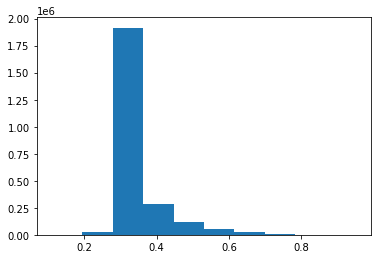

In [136]:
plt.hist(findata['Total_Score'])

In [12]:
reviews = pd.read_csv("reviews.csv")
unique_company_IDs_20K = reviews['company_uuid'].unique()